In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

In [2]:
############ DATA & TRANSFORMS

from data import get_data
from device import get_device

device = get_device(force_cpu=False)


horizontal_flip_prob = 0.2
vertical_flip_prob = 0.0
gaussian_blur_prob = 0.0
rotate_degree = 20
cutout = 0.3
#
transform_args = {}


transform_args['horizontal_flip_prob'] =  0.2
transform_args['vertical_flip_prob'] = 0.0
transform_args['gaussian_blur_prob'] = 0.0
transform_args['rotate_degree'] = 20
transform_args['cutout'] = 0.3
transform_args['cutout_height'] = 16
transform_args['cutout_width'] = 16


train_loader, test_loader = get_data(device,transform_args,batch_size=64 )

Files already downloaded and verified
Files already downloaded and verified


In [3]:
train_loader.dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [4]:
##################### MODEL

from resnet_build import ResNet18
from torchsummary import summary
model = ResNet18().to(device)

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

C:\Users\saina\Anaconda3\envs\pytorchenv\lib\site-packages\torch_lr_finder\lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm



Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.10E-02


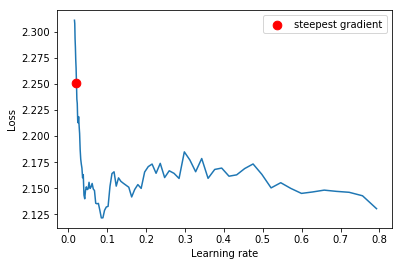

In [5]:
import torch.optim as optim
from torch_lr_finder import LRFinder

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
    
lr_finder.range_test(train_loader, end_lr=1, num_iter=100)
# lr_finder.range_test(train_loader, val_loader=test_loader, end_lr=1, num_iter=100, step_mode = step_mode)
lr_finder.plot(log_lr=False)
lr_finder.reset()

In [7]:
from run import run_model

lr = 2.10E-02
epochs = 50
regularization = {'l1_factor':0,'l2_factor':0}

model,train_trackers,test_trackers,incorrect_samples = run_model(model, train_loader, test_loader, epochs, device, lr, **regularization)


Epoch 1:
(TRAIN) batch_number:  100 Loss : 1.676 Acc : 0.29375
(TRAIN) batch_number:  200 Loss : 1.449 Acc : 0.34539
(TRAIN) batch_number:  300 Loss : 1.242 Acc : 0.37151
(TRAIN) batch_number:  400 Loss : 1.371 Acc : 0.40023
(TRAIN) batch_number:  500 Loss : 1.375 Acc : 0.42294
(TRAIN) batch_number:  600 Loss : 1.127 Acc : 0.44497
(TRAIN) batch_number:  700 Loss : 0.9622 Acc : 0.46279
(TEST) Correct_classified :  5380  of 10000
(TEST) Loss : 1.318 Acc : 0.538

 ************************************************************ 


Epoch 2:
(TRAIN) batch_number:  100 Loss : 1.013 Acc : 0.62562
(TRAIN) batch_number:  200 Loss : 1.033 Acc : 0.6293
(TRAIN) batch_number:  300 Loss : 1.031 Acc : 0.6338
(TRAIN) batch_number:  400 Loss : 0.8027 Acc : 0.64156
(TRAIN) batch_number:  500 Loss : 0.8764 Acc : 0.64669
(TRAIN) batch_number:  600 Loss : 0.668 Acc : 0.65513
(TRAIN) batch_number:  700 Loss : 0.7324 Acc : 0.66087
(TEST) Correct_classified :  6998  of 10000
(TEST) Loss : 0.8658 Acc : 0.6998

 *

(TRAIN) batch_number:  400 Loss : 0.2007 Acc : 0.93348
(TRAIN) batch_number:  500 Loss : 0.1756 Acc : 0.93319
(TRAIN) batch_number:  600 Loss : 0.1826 Acc : 0.93188
(TRAIN) batch_number:  700 Loss : 0.4214 Acc : 0.93071
(TEST) Correct_classified :  8736  of 10000
(TEST) Loss : 0.3969 Acc : 0.8736

 ************************************************************ 


Epoch 17:
(TRAIN) batch_number:  100 Loss : 0.2256 Acc : 0.93312
(TRAIN) batch_number:  200 Loss : 0.2064 Acc : 0.93305
(TRAIN) batch_number:  300 Loss : 0.1936 Acc : 0.93635
(TRAIN) batch_number:  400 Loss : 0.2748 Acc : 0.93586
(TRAIN) batch_number:  500 Loss : 0.2259 Acc : 0.93566
(TRAIN) batch_number:  600 Loss : 0.1076 Acc : 0.93555
(TRAIN) batch_number:  700 Loss : 0.2555 Acc : 0.93489
(TEST) Correct_classified :  8702  of 10000
(TEST) Loss : 0.4399 Acc : 0.8702

 ************************************************************ 


Epoch 18:
(TRAIN) batch_number:  100 Loss : 0.1235 Acc : 0.94406
(TRAIN) batch_number:  200 Loss 

(TRAIN) batch_number:  600 Loss : 0.1477 Acc : 0.96716
(TRAIN) batch_number:  700 Loss : 0.08777 Acc : 0.96725
(TEST) Correct_classified :  8916  of 10000
(TEST) Loss : 0.3689 Acc : 0.8916

 ************************************************************ 


Epoch 32:
(TRAIN) batch_number:  100 Loss : 0.05876 Acc : 0.97016
(TRAIN) batch_number:  200 Loss : 0.06822 Acc : 0.97094
(TRAIN) batch_number:  300 Loss : 0.07189 Acc : 0.97151
(TRAIN) batch_number:  400 Loss : 0.0507 Acc : 0.97016
(TRAIN) batch_number:  500 Loss : 0.1328 Acc : 0.96975
(TRAIN) batch_number:  600 Loss : 0.1297 Acc : 0.97
(TRAIN) batch_number:  700 Loss : 0.04263 Acc : 0.9702
(TEST) Correct_classified :  9008  of 10000
(TEST) Loss : 0.3506 Acc : 0.9008

 ************************************************************ 


Epoch 33:
(TRAIN) batch_number:  100 Loss : 0.05201 Acc : 0.97375
(TRAIN) batch_number:  200 Loss : 0.06249 Acc : 0.9725
(TRAIN) batch_number:  300 Loss : 0.091 Acc : 0.97297
(TRAIN) batch_number:  400 Loss

(TRAIN) batch_number:  700 Loss : 0.05392 Acc : 0.98893
(TEST) Correct_classified :  9142  of 10000
(TEST) Loss : 0.3244 Acc : 0.9142

 ************************************************************ 


Epoch 47:
(TRAIN) batch_number:  100 Loss : 0.01759 Acc : 0.98828
(TRAIN) batch_number:  200 Loss : 0.009927 Acc : 0.98789
(TRAIN) batch_number:  300 Loss : 0.04172 Acc : 0.98766
(TRAIN) batch_number:  400 Loss : 0.06396 Acc : 0.98801
(TRAIN) batch_number:  500 Loss : 0.06095 Acc : 0.98809
(TRAIN) batch_number:  600 Loss : 0.07386 Acc : 0.98828
(TRAIN) batch_number:  700 Loss : 0.01466 Acc : 0.9883
(TEST) Correct_classified :  9115  of 10000
(TEST) Loss : 0.3307 Acc : 0.9115

 ************************************************************ 


Epoch 48:
(TRAIN) batch_number:  100 Loss : 0.006495 Acc : 0.98844
(TRAIN) batch_number:  200 Loss : 0.003961 Acc : 0.98914
(TRAIN) batch_number:  300 Loss : 0.08518 Acc : 0.9888
(TRAIN) batch_number:  400 Loss : 0.005808 Acc : 0.98875
(TRAIN) batch_numb

In [9]:
torch.save(model.state_dict() , 'C://Users//saina//Documents//EVA//S10//trained50ep.pt') 

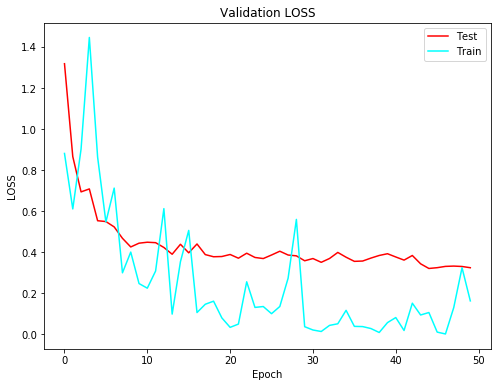

In [20]:
import matplotlib.pyplot as plt

metric = 'LOSS'
# Initialize a figure
fig = plt.figure(figsize=(8, 6))

# Plot values
plain_plt, = plt.plot(train_trackers['train_losses'], color='cyan', label='Train')
plain_plt, = plt.plot(test_trackers['test_losses' ], color='red', label='Test')

# Set plot title
plt.title(f'Validation {metric}')
plt.title(f'Validation {metric}')

# Label axes
plt.xlabel('Epoch')
plt.ylabel(metric)

plt.legend()

plt.savefig('.\\loss.png')

# Set legend
location = 'upper' if metric == 'Loss' else 'lower'

# INCORRECT

In [22]:
from gradcam import ModelGradCam ,gradcam_out
%load_ext autoreload
%autoreload 2

x,y,z = gradcam_out(model,incorrect_samples[10],device)
x.shape

Image Written


(32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


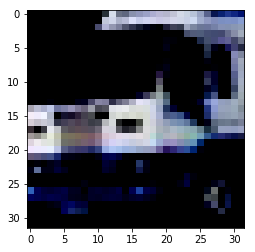

In [38]:
import matplotlib.pyplot as plt

i = img_d['image'].cpu().data.numpy()

i2 = np.transpose(i,(1,2,0))

plt.imshow(i2)

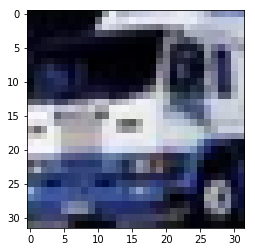

In [39]:
new_arr = ((i2 - i2.min()) * (1/(i2.max() - i2.min()) * 255)).astype('uint8')
plt.imshow(new_arr)

# PLOT MISCLASSIIFIED IMG WITH GRADCAM ON TOP

Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written


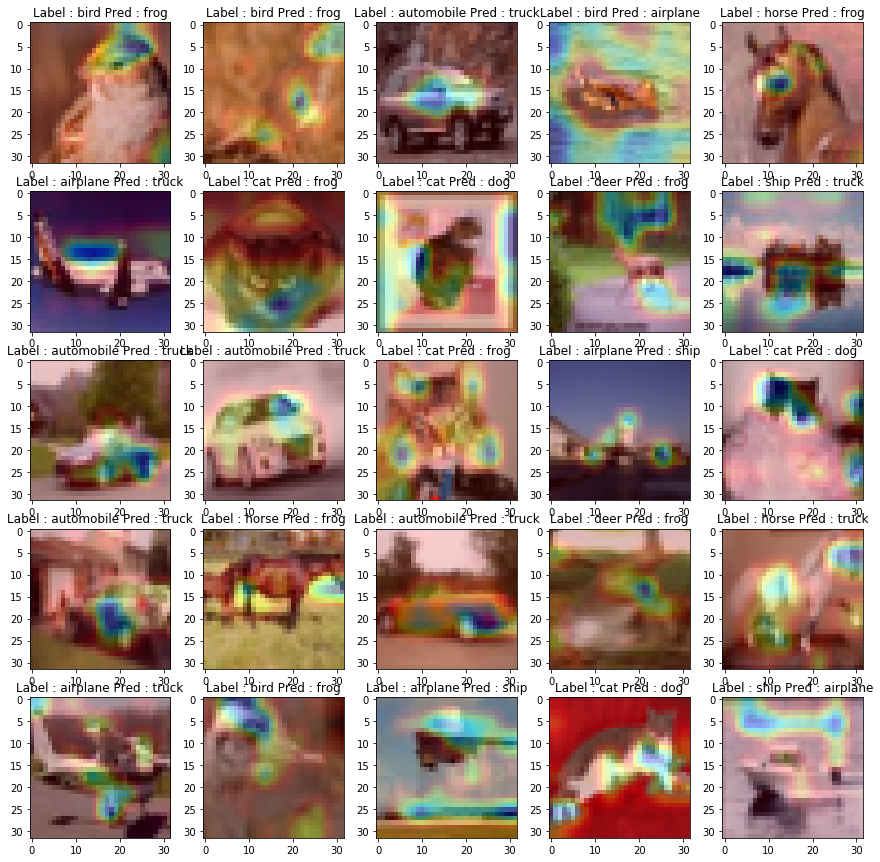

In [24]:
import numpy as np
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 5

# ax enables access to manipulate each of subplots
ax = []

for i in range(len(incorrect_samples[:25])):
    img,lab,pred = gradcam_out(model,incorrect_samples[i],device)
    
    # create subplot and append to ax
    ax.append(fig.add_subplot(rows, columns, i+1) )
    new_arr = ((img - img.min()) * (1/(img.max() - img.min()) * 255)).astype('uint8')
    ax[-1].set_title("Label : "+ lab + " Pred : " + pred)  # set title
    plt.imshow(new_arr)

fig.savefig(f'.\\Incorrect_GC\\incorrect_predictions.png', bbox_inches='tight')
plt.show()  # finally, render the plot